# PyTorch Custom Model

This notebook demonstrates how to create a custom PyTorch model to fit a
parabolic function to noisy synthetic data. It shows the complete
workflow from data generation and visualization to model definition,
training with gradient descent, and evaluation.

Import required libraries.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Define function to generate noisy parabolic data.

In [2]:
def generate_parabola_data(a, b, c, n_points=100, noise_std=500):
    x = torch.linspace(-250, 250, n_points)
    y = a * x**2 + b * x + c + torch.randn_like(x) * noise_std
    return x, y

Set true parameters for the parabola.

In [3]:
true_a = -0.6
true_b = -25
true_c = 3.5

Generate data and visualize the noisy dataset.

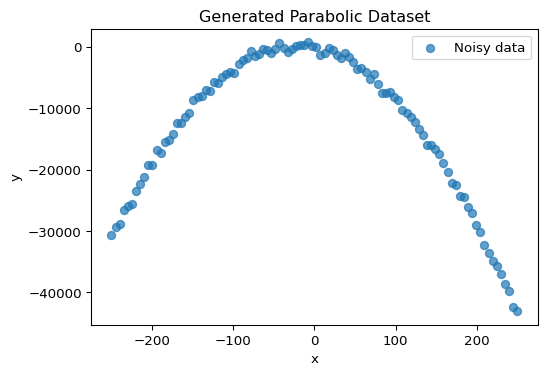

In [4]:
x, y = generate_parabola_data(true_a, true_b, true_c)
plt.figure(figsize=(6, 4))
plt.scatter(x.numpy(), y.numpy(), label="Noisy data", alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Parabolic Dataset")
plt.legend()
plt.show()

Define a custom PyTorch model for parabola fitting.

In [5]:
class ParabolaModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
        self.c = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.a * x**2 + self.b * x + self.c

Train the model using Adam optimizer and MSE loss.

In [6]:
model = ParabolaModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss.item():.6f}")

Epoch    0 | Loss = 3347690240.000000
Epoch  100 | Loss = 7677988.500000
Epoch  200 | Loss = 4594257.500000
Epoch  300 | Loss = 2670951.250000
Epoch  400 | Loss = 1502314.750000
Epoch  500 | Loss = 844869.062500
Epoch  600 | Loss = 505393.125000
Epoch  700 | Loss = 345648.437500
Epoch  800 | Loss = 277512.718750
Epoch  900 | Loss = 251272.687500

Compare true parameters with learned parameters.

In [7]:
print("\nTrue parameters:")
print(f"a = {true_a}, b = {true_b}, c = {true_c}")

print("\nLearned parameters:")
print(f"a = {model.a.item():.4f}, b = {model.b.item():.4f}, c = {model.c.item():.4f}")


True parameters:
a = -0.6, b = -25, c = 3.5

Learned parameters:
a = -0.5984, b = -24.7854, c = -2.5602

Visualize the fitted parabola against the original data.

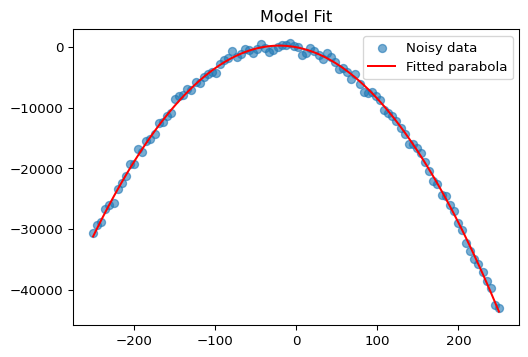

In [8]:
with torch.no_grad():
    y_fit = model(x)

plt.figure(figsize=(6, 4))
plt.scatter(x.numpy(), y.numpy(), label="Noisy data", alpha=0.6)
plt.plot(x.numpy(), y_fit.numpy(), color="red", label="Fitted parabola")
plt.legend()
plt.title("Model Fit")
plt.show()